#### 다중 분류를 위한 OvR(OvA)
- 분류 클래스 수만큼 이진분류기를 생성하여 다중 분류를 진행

In [66]:
### 모듈 로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# 판다스/넘파이에 지수표기점(과학적 표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ===> 1D로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0~9까지, 즉 총 10개의 클래스
    * 흑백 이미지

In [67]:
## 데이터 로딩
featureDF , targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0~255 범위 (보통 이미지는 255로 나눔 => 연산을 쉽게 해주려고 하는편임)
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [68]:
featureDF.head(1), targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

(8, 8)


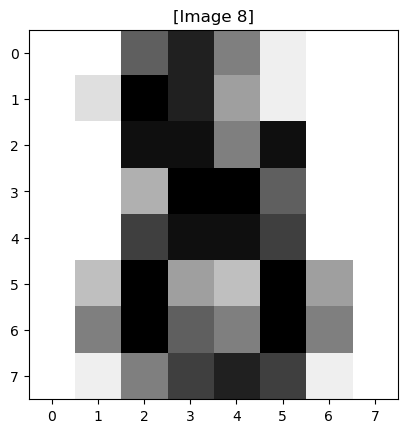

In [69]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

# 1D ==> 2D 형태로 이미지 데이터
imageData = featureDF.iloc[1796].to_numpy().reshape(-1,8)
print(imageData.shape)

# 시각화
plt.imshow(imageData, cmap='binary')
plt.title(f'[Image {targetSR[1796]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [70]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, stratify=targetSR, random_state=10)

In [71]:
X_train.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,...,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000,1347.00000
mean,0.00000,0.00122,0.02038,0.04630,0.04672,0.02294,0.00537,0.00049,0.00003,0.00784,...,0.01471,0.00082,0.00000,0.00109,0.02171,0.04734,0.04645,0.02685,0.00821,0.00149
std,0.00000,0.00365,0.01858,0.01694,0.01657,0.02230,0.01305,0.00401,0.00041,0.01266,...,0.01927,0.00379,0.00011,0.00369,0.01996,0.01742,0.01930,0.02304,0.01621,0.00749
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00392,0.03922,0.03922,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00392,0.04314,0.03922,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.01569,0.05098,0.05098,0.01569,0.00000,0.00000,0.00000,0.00000,...,0.00392,0.00000,0.00000,0.00000,0.01569,0.05098,0.05490,0.02353,0.00000,0.00000
75%,0.00000,0.00000,0.03529,0.05882,0.05882,0.04314,0.00000,0.00000,0.00000,0.01176,...,0.02745,0.00000,0.00000,0.00000,0.03922,0.06275,0.06275,0.04706,0.00784,0.00000
max,0.00000,0.03137,0.06275,0.06275,0.06275,0.06275,0.06275,0.05490,0.00784,0.06275,...,0.06275,0.05098,0.00392,0.03529,0.06275,0.06275,0.06275,0.06275,0.06275,0.06275


- OvR(One vs Rest) 또는 OvA(One vs All)
    * 클래스마다 이진 분류기 만들어서 가장 높은 결정 점수 낸 클래스 선택

In [72]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [73]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}')

ovr_clf.estimators_ : 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [77]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx}분류기]')
    print('[선형식 값]',ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)
    # print('[decision functions]', decision_functions)
    print('[선형식 값]',ovr_clf.decision_function(X_train.iloc[:1]))
    print('[확률값]', ovr_clf.predict_proba(X_train.iloc[:1]))

[0분류기]
[선형식 값] [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]] [-2.294685]
[선형식 값] [[-2.50438  -2.360388 -2.258641 -1.818556 -2.491658 -1.917085 -2.100526
  -2.452999 -2.44828  -2.340241]]
[확률값] [[0.079003 0.090183 0.098928 0.145985 0.079937 0.134043 0.114027 0.082838
  0.083199 0.091857]]
[1분류기]
[선형식 값] [[ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061

In [ ]:
ovr_clf.predict_proba(X_test.iloc[:1])

array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776]])

In [ ]:
ovr_clf.predict_proba(X_test.iloc[:1]).max(), ovr_clf.predict_proba(X_test.iloc[:1]).argmax()

(0.19225414581646177, 3)

In [ ]:
ovr_clf.decision_function(X_test.iloc[:1])

array([[-2.460142, -2.472932, -2.016484, -1.436581, -3.020684, -2.128551,
        -2.402974, -2.589656, -2.30416 , -1.843406]])

In [ ]:
ovr_clf.predict(X_test.iloc[:1])

array([3])